In [1]:
%matplotlib inline
from skimage import io
from collections import defaultdict
from skimage.transform import resize 

'try skeleton feature too on data once from skimage'

'try skeleton feature too on data once from skimage'

In [2]:
def slide(img, win_size, clf):
    res = img.copy()
    height, width = img.shape
    for y in range(height - win_size + 1):
        for x in range(width - win_size + 1):
            pass
            

In [2]:
# The cell that gets the data
base_dir = '/home/ayush/GPU_ML/ML/workspace/project/raw/'

train_x_grp_1 = []
train_y_grp_1 = []

train_x_grp_2 = []
train_y_grp_2 = []

train_x_grp_3 = []
train_y_grp_3 = []

train_x_grp_4 = []
train_y_grp_4 = []

train_x_grp_5 = []
train_y_grp_5 = []

with open('bounding_boxes.csv','r') as f:
    f.readline()
    for line in f:
        data = line.strip().split(',')
        
        file_name = data[0]
        grp = int(file_name.split('_')[0]) - 1
        
        label_s = data[-1]
        
        x1,y1,x2,y2,label_i = map(int, data[1:])
        
        file_path = base_dir + label_s + '/' + file_name
        img = io.imread(file_path, as_grey = True)
        img = img[y1:y2,x1:x2]
        img = resize(img, (128,128) )
        
        if(grp/4==0):
            train_x_grp_1.append(img)
            train_y_grp_1.append(label_i)
        if(grp/4==1):
            train_x_grp_2.append(img)
            train_y_grp_2.append(label_i)
        if(grp/4==2):
            train_x_grp_3.append(img)
            train_y_grp_3.append(label_i)
        if(grp/4==3):
            train_x_grp_4.append(img)
            train_y_grp_4.append(label_i)
        if(grp/4==4):
            train_x_grp_5.append(img)
            # train_y_grp_5.append(np.asarray([label_i]))
            train_y_grp_5.append(label_i)

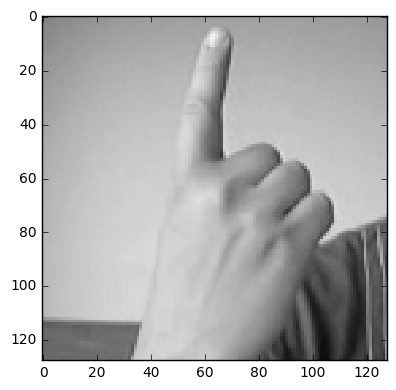

In [4]:
io.imshow(train_x_grp_1[0])

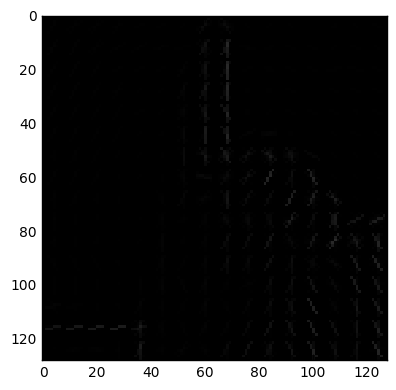

In [3]:
# Testing HOG
from skimage.feature import hog

# fd, hog_image = hog(train_x_grp_1[0], orientations=8, pixels_per_cell=(8, 8),\
#                     cells_per_block=(2, 2), visualise=True)
fd, hog_image = hog(train_x_grp_1[0], visualise=True)
# print fd
io.imshow(hog_image)

In [4]:
# converting images to HOG descriptors
import numpy as np

train_x_grp_1_hog = np.asarray(map(lambda x : hog(x), train_x_grp_1))
train_x_grp_2_hog = np.asarray(map(lambda x : hog(x), train_x_grp_2))
train_x_grp_3_hog = np.asarray(map(lambda x : hog(x), train_x_grp_3))
train_x_grp_4_hog = np.asarray(map(lambda x : hog(x), train_x_grp_4))
train_x_grp_5_hog = np.asarray(map(lambda x : hog(x), train_x_grp_5))

In [5]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import svm
import numpy as np

In [6]:
train_x_1 = np.concatenate(( np.concatenate((train_x_grp_2_hog , train_x_grp_3_hog )), train_x_grp_4_hog ))
train_y_1 = np.asarray( train_y_grp_2     + train_y_grp_3     + train_y_grp_4     )

train_x_2 = np.concatenate(( np.concatenate((train_x_grp_1_hog , train_x_grp_3_hog )), train_x_grp_4_hog ))
train_y_2 = np.asarray( train_y_grp_1     + train_y_grp_3     + train_y_grp_4     )

train_x_3 = np.concatenate(( np.concatenate((train_x_grp_1_hog , train_x_grp_2_hog )), train_x_grp_4_hog ))
train_y_3 = np.asarray( train_y_grp_1     + train_y_grp_2     + train_y_grp_4     )

train_x_4 = np.concatenate(( np.concatenate((train_x_grp_1_hog , train_x_grp_2_hog )), train_x_grp_3_hog ))
train_y_4 = np.asarray( train_y_grp_1     + train_y_grp_2     + train_y_grp_3     )

In [9]:
# Cross validation

# with first group as validation data
clf_rfc_1 = RFC()
clf_rfc_1.fit(train_x_1, train_y_1)

acc_rfc_1 = clf_rfc_1.score(np.asarray(train_x_grp_1_hog), np.asarray(train_y_grp_1))
print acc_rfc_1

0.875


In [10]:
# with second group as validation data
clf_rfc_2 = RFC()
clf_rfc_2.fit(train_x_2, train_y_2)

acc_rfc_2 = clf_rfc_2.score(np.asarray(train_x_grp_2_hog), np.asarray(train_y_grp_2))
print acc_rfc_2

0.835


In [11]:
# with third group as validation data
clf_rfc_3 = RFC()
clf_rfc_3.fit(train_x_3, train_y_3)

acc_rfc_3 = clf_rfc_3.score(np.asarray(train_x_grp_3_hog), np.asarray(train_y_grp_3))
print acc_rfc_3

0.785


In [12]:
# with fourth group as validation data
clf_rfc_4 = RFC()
clf_rfc_4.fit(train_x_4, train_y_4)

acc_rfc_4 = clf_rfc_4.score(np.asarray(train_x_grp_4_hog), np.asarray(train_y_grp_4))
print acc_rfc_4

print 'average : %f' %((acc_rfc_1 + acc_rfc_2 + acc_rfc_3 + acc_rfc_4)/4) 

0.795
average : 0.822500


In [13]:
'Now we test the same with SVM'

clf_svm_1 = svm.LinearSVC()
clf_svm_1.fit(train_x_1, train_y_1)

acc_svm_1 = clf_svm_1.score(np.asarray(train_x_grp_1_hog), np.asarray(train_y_grp_1))
print acc_svm_1

0.945


In [14]:
clf_svm_2 = svm.LinearSVC()
clf_svm_2.fit(train_x_2, train_y_2)

acc_svm_2 = clf_svm_2.score(np.asarray(train_x_grp_2_hog), np.asarray(train_y_grp_2))
print acc_svm_2

0.895


In [15]:
clf_svm_3 = svm.LinearSVC()
clf_svm_3.fit(train_x_3, train_y_3)

acc_svm_3 = clf_svm_1.score(np.asarray(train_x_grp_3_hog), np.asarray(train_y_grp_3))
print acc_svm_3

1.0


In [16]:
clf_svm_4 = svm.LinearSVC()
clf_svm_4.fit(train_x_4, train_y_4)

acc_svm_4 = clf_svm_4.score(np.asarray(train_x_grp_4_hog), np.asarray(train_y_grp_4))
print acc_svm_4

print 'Average : %f' %((acc_svm_1 + acc_svm_2 + acc_svm_3 + acc_svm_4)/4)

0.925
Average : 0.941250


In [17]:
score_1 = clf_svm_1.score(np.asarray(train_x_grp_5_hog), np.asarray(train_y_grp_5))
score_2 = clf_svm_2.score(np.asarray(train_x_grp_5_hog), np.asarray(train_y_grp_5))
score_3 = clf_svm_3.score(np.asarray(train_x_grp_5_hog), np.asarray(train_y_grp_5))
score_4 = clf_svm_4.score(np.asarray(train_x_grp_5_hog), np.asarray(train_y_grp_5))

print 'Average : %f' %((score_1 + score_2 + score_3 + score_4)/4)

Average : 0.822500


In [21]:
'To get the scoring based on voting on classes given by the individual classifiers'
from collections import defaultdict
res = []
for data in train_x_grp_5_hog:
    classes = defaultdict(int)
    classes[clf_svm_1.predict(np.asarray([data]))[0]]=+1
    classes[clf_svm_2.predict(np.asarray([data]))[0]]=+1
    classes[clf_svm_3.predict(np.asarray([data]))[0]]=+1
    classes[clf_svm_4.predict(np.asarray([data]))[0]]=+1
    maxx = 0
    class_ = None
    for cls in classes:
        if classes[cls] > maxx:
            maxx = classes[cls]
            class_ = cls
    if class_ is None:
        print 'Aborting'
        break
    res.append(class_)
count = 0
for index in range(len(res)):
    if train_y_grp_5[index] == res[index]:
        count+=1
print 'score : %f' %((count*1.0)/len(res))

score : 0.835000


In [32]:
VC_train_x = np.concatenate((train_x_4, train_x_grp_4_hog))
VC_train_y = np.concatenate((train_y_4, train_y_grp_4))

VC_train_xx = np.concatenate((VC_train_x, train_x_grp_5_hog))
VC_train_yy = np.concatenate((VC_train_y, train_y_grp_5))

from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

VC_rfc = RFC()
VC_svm = svm.LinearSVC()
VC_nbc = GaussianNB()

VC_clf = VotingClassifier(estimators=[('rfc', VC_rfc), ('svm', VC_svm), ('nbc', VC_nbc)], voting='hard')
VC_clf.fit(VC_train_x, VC_train_y)

VC_clf.score(train_x_grp_5_hog, train_y_grp_5)

0.85499999999999998

In [34]:
VC_rfc_ = RFC()
VC_nbc_ = GaussianNB()

VC_clf = VotingClassifier(estimators=[('rfc', VC_rfc_), ('nbc', VC_nbc_)], voting='soft')
VC_clf.fit(VC_train_x, VC_train_y)

VC_clf.score(train_x_grp_5_hog, train_y_grp_5)

0.82999999999999996

In [15]:
'using AdaBoost'
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

clf_abc_1 = AdaBoostClassifier(base_estimator=RFC,n_estimators=100)
clf_abc_1.fit(train_x_1, train_y_1)

score_abc_1 = clf_abc_1.score(np.asarray(train_x_grp_1_hog), np.asarray(train_y_grp_1))
print score_abc_1

TypeError: unbound method get_params() must be called with RandomForestClassifier instance as first argument (got nothing instead)

In [8]:
clf_abc_2 = AdaBoostClassifier(n_estimators=100)
clf_abc_2.fit(train_x_2, train_y_2)

score_abc_2 = clf_abc_2.score(np.asarray(train_x_grp_2_hog), np.asarray(train_y_grp_2))
print score_abc_2

0.655


In [9]:
clf_abc_3 = AdaBoostClassifier(n_estimators=100)
clf_abc_3.fit(train_x_3, train_y_3)

score_abc_3 = clf_abc_3.score(np.asarray(train_x_grp_3_hog), np.asarray(train_y_grp_3))
print score_abc_3

0.51


In [10]:
clf_abc_4 = AdaBoostClassifier(n_estimators=100)
clf_abc_4.fit(train_x_4, train_y_4)

score_abc_4 = clf_abc_4.score(np.asarray(train_x_grp_4_hog), np.asarray(train_y_grp_4))
print score_abc_4

0.53


In [11]:
print 'Average : %f' %((score_abc_1 + score_abc_2 + score_abc_3 + score_abc_4)/4)

Average : 0.575000
